## Tarea 05 Métodos Computacionales

### Gabriel Cataño Sánchez
#### CC: 1039474879

# Interpolación en una imagen usando diferentes metodos.*

Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange, en estos puntos, para aproximar el dibujo.

3. a Emplear diferencias divididas y el polinomio de hermite.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [93]:
#Librerías.
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd
from scipy.interpolate import lagrange
%matplotlib inline

In [3]:
#Para cargar documentos en el Colab.
from google.colab import files
from IPython.display import Image
uploaded = files.upload() #Dar la direccion para cargar el archivo planetarios.png


In [3]:
!ls 

planetario.jpg	sample_data


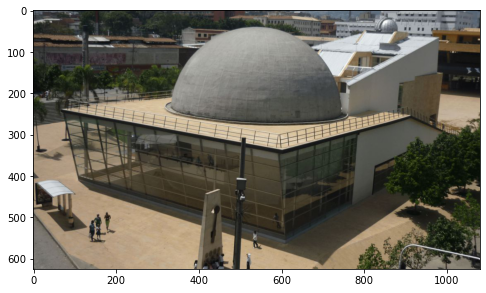

In [92]:
#Carga y muestra de la imagen.
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg') 
plt.imshow(imagen)
plt.show()

In [5]:
#Forma de la Imagen(matriz).
np.shape(imagen)

(625, 1080, 3)

In [11]:
#Ubicación en el eje horizontal de los puntos sobre el domo en la imagen.
x_ = np.array([332, 338, 344, 360, 380, 399, 429, 451, 471, 498, 524,547, 585,\
               605, 631, 657, 677, 691, 708, 717, 725, 732, 738, 742, 744, 745])

#Ubicación en el eje vertical de los puntos sobre el domo en la imagen.
y_ = np.array([230, 198, 177, 142, 116, 94, 71, 60, 51, 45, 41, 41, 45, 52, \
               63, 79, 94, 109, 131, 146, 162, 178, 199, 215, 237, 251])

In [15]:
df = pd.DataFrame({"X":x_, "Y": y_})

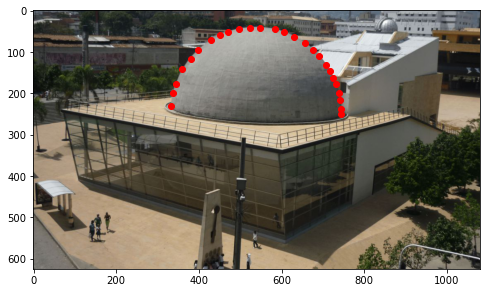

In [17]:
#Imagen con los puntos sobre el domo.
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg') 
plt.imshow(imagen)
plt.plot(df.X, df.Y, "ro")
plt.show()

$\alpha^{2}$

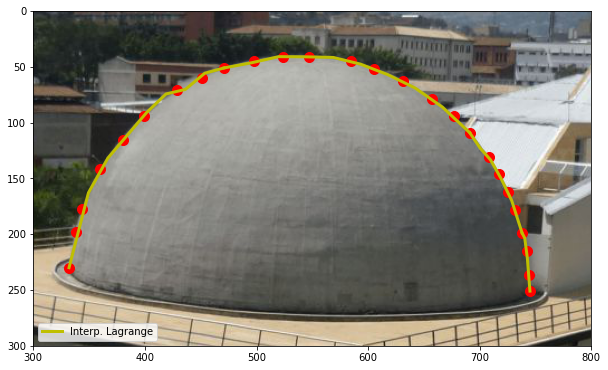

In [86]:
#Interpolación de Lagrange a los puntos que sacamos de la imagen.
#==============================================
ni = 0
n  = 9
xx1 = np.linspace( np.min(x_[ni:n]), np.max(x_[ni:n]), len(x_[ni:n]))
p_lagrange1 = lagrange(x_[ni:n], y_[ni:n])
#==============================================
ni = 8
n  = 18
xx2 = np.linspace( np.min(x_[ni:n]), np.max(x_[ni:n]), len(x_[ni:n]))
p_lagrange2 = lagrange(x_[ni:n], y_[ni:n])
#==============================================
ni = 17
n  = 23
xx3 = np.linspace( np.min(x_[ni:n]), np.max(x_[ni:n]), len(x_[ni:n]))
p_lagrange3 = lagrange(x_[ni:n], y_[ni:n])
#==============================================
ni = 22
n  = 26
xx4 = np.linspace( np.min(x_[ni:n]), np.max(x_[ni:n]), len(x_[ni:n]))
p_lagrange4 = lagrange(x_[ni:n], y_[ni:n])
#==============================================

#Mustra la interpolación hecha sobre los puntos y sobre el domo.
plt.figure(figsize=(10, 8))
plt.imshow(imagen)
plt.plot(df.X, df.Y,  'ro', markersize = 10)
plt.plot(xx1, p_lagrange1(xx1), "y-", lw=3, label='Interp. Lagrange')
plt.plot(xx2, p_lagrange2(xx2), "y-", lw=3)
plt.plot(xx3, p_lagrange3(xx3), "y-", lw=3)
plt.plot(xx4, p_lagrange4(xx4), "y-", lw=3)
plt.ylim(300, 0)
plt.xlim(300, 800)
plt.legend(loc='lower left')
plt.show()

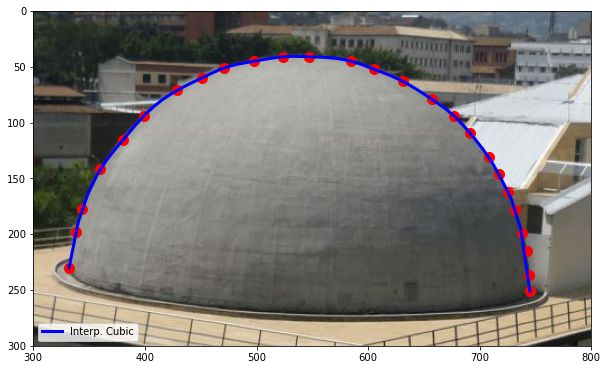

In [113]:
#Interpolación cúbica.
xx = np.linspace( np.min(x_), np.max(x_))
S_cubico1 =  interpolate.interp1d(x_, y_, kind = "cubic")

#Mustra la interpolación hecha sobre los puntos y sobre el domo.
plt.figure(figsize=(10, 8))
plt.imshow(imagen)
plt.plot(df.X, df.Y,'ro', markersize = 10)
plt.plot(xx, S_cubico1(xx), "b-", lw = 3, label = u'Interp. Cubic')
plt.ylim(300, 0)
plt.xlim(300, 800)
plt.legend(loc = 'lower left')
plt.show()

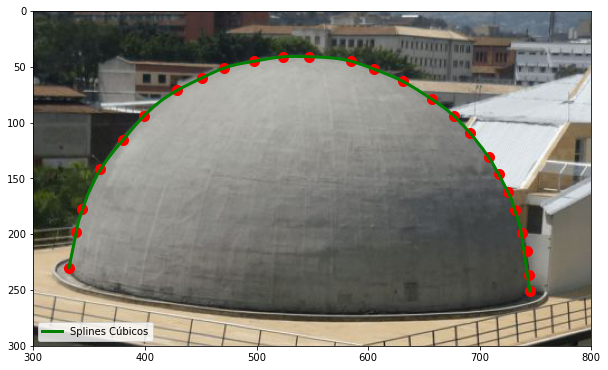

In [105]:
#Interpolación CubicSpline.
xx = np.linspace( np.min(x_), np.max(x_))
#Las parejas deben de estar en orden para emplear esta rutina.
S_cubico2 = interpolate.CubicSpline(x_, y_) 

#Mustra la interpolación hecha sobre los puntos y sobre el domo.
plt.figure(figsize=(10, 8))
plt.imshow(imagen)
plt.plot(df.X, df.Y,'ro', markersize = 10)
plt.plot(xx, S_cubico2(xx), "g-", lw = 3, label = u'Splines Cúbicos')
plt.ylim(300, 0)
plt.xlim(300, 800)
plt.legend(loc = 'lower left')
plt.show()

Podemos observar de las tres imagenes anteriores que, la interpolación que mejor se acomoda a los puntos escogidos sobre el domo son,  `interp1d(kind = "cubic")` y `CubicSpline`, pues se ve que las curvas que siguen ambas son más suaves, por el contrario, la interpolación con `lagrange` depende de la cantidad de puntos que tomemos, si se toman muchos puntos, la curva tendrá fluctuaciones y se puede desviar del camino deseado.\
Para hacer la interpolación con `lagrange`, se dividieron los puntos en intervalos y así acomodar la curva a los puntos sobre el domo, en las otras dos interpolaciones, no fue necesario dividir el intervalo, el polinomio se acomodó de la manera que se quería.